# k-means 알고리즘으로 붓꽃 품종 구분하기

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
import pandas as pd

In [3]:
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data = iris.data, columns = ['sepal_length', 'sepal_width', 
                                                    'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
KM = KMeans(n_clusters = 3, init = 'k-means++', max_iter= 300, random_state = 0)
KM.fit(iris_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [5]:
KM.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [6]:
iris_df['target'] = iris.target
iris_df['cluster'] = KM.labels_
iris_df.groupby(['target', 'cluster'])['sepal_length'].count()

target  cluster
0       1          50
1       0          47
        2           3
2       0          14
        2          36
Name: sepal_length, dtype: int64

# 실루엣 (Silhouette) 계수 측정

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples
score_sampels = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouet_coef'] = score_sampels
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouet_coef
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918


In [8]:
silhouette_score(iris.data, iris_df['cluster'])

np.float64(0.5511916046195919)

# 실루엣 차트

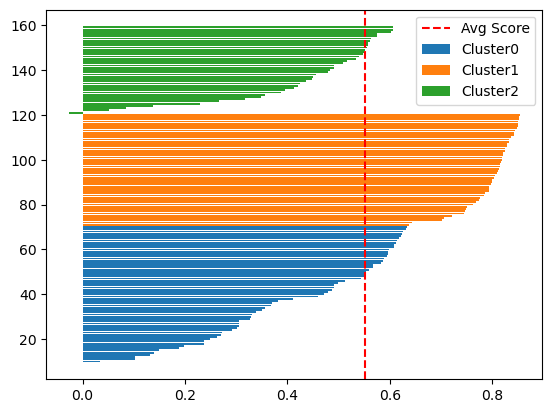

In [9]:
import matplotlib.pyplot as plt

y_lower = 10
for i in range(3):
    cluster_i = score_sampels[iris_df['cluster'] == i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label = f'Cluster{i}')
    y_lower = y_upper

avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color = 'red', linestyle = '--', label = 'Avg Score')
plt.legend()
plt.show()

# Scree plt

In [10]:
KM.inertia_

78.85566582597728

In [11]:
scree_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:14

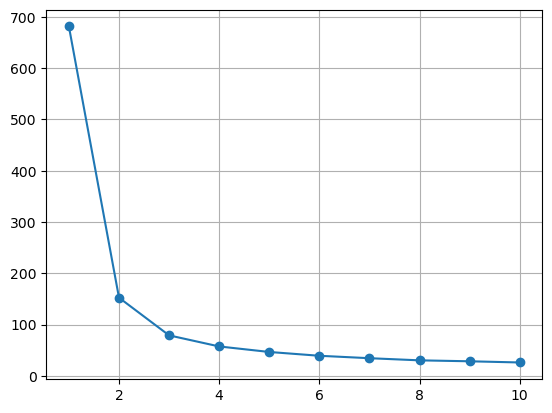

In [12]:
inertia = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker = 'o')
plt.grid()
plt.show()

# PCA => 2개의 주성분으로 축소

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [14]:
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouet_coef,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755


# PCA 결과 시각화

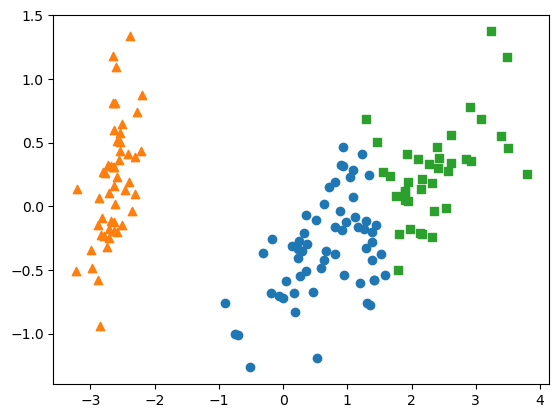

In [15]:
plt.scatter(x = iris_df.loc[iris_df['cluster'] == 0, 'pca_x'], 
            y = iris_df.loc[iris_df['cluster'] == 0, 'pca_y'], marker = 'o')

plt.scatter(x = iris_df.loc[iris_df['cluster'] == 1, 'pca_x'], 
            y = iris_df.loc[iris_df['cluster'] == 1, 'pca_y'], marker = '^')

plt.scatter(x = iris_df.loc[iris_df['cluster'] == 2, 'pca_x'], 
            y = iris_df.loc[iris_df['cluster'] == 2, 'pca_y'], marker = 's')

plt.show()

In [38]:
# StandardScaler로 스케일링
# PCA 2개로 축소
# 시각화

In [16]:
from sklearn.preprocessing import StandardScaler
iris_caled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_caled[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.35832938, -1.30971087],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 , -1.22474487,
         0.18259934,  1.18857506, -1.32435711],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 , -1.22474487,
         0.18259934,  1.25113184, -1.40967409]])

In [17]:
from sklearn.decomposition import PCA
pca_scaled = PCA(n_components=2)
pca_transformed_scaled =  pca_scaled.fit_transform(iris_caled)
#주성분1, 주성분2
iris_df['pca_scaled_x'] = pca_transformed_scaled[:, 0]
iris_df['pca_scaled_y'] = pca_transformed_scaled[:, 1]
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouet_coef,pca_x,pca_y,pca_scaled_x,pca_scaled_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397,-3.152120,0.710720
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001,-2.970722,-0.083819
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949,-3.230879,0.139873
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299,-3.116799,-0.053567
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755,-3.245118,0.811202


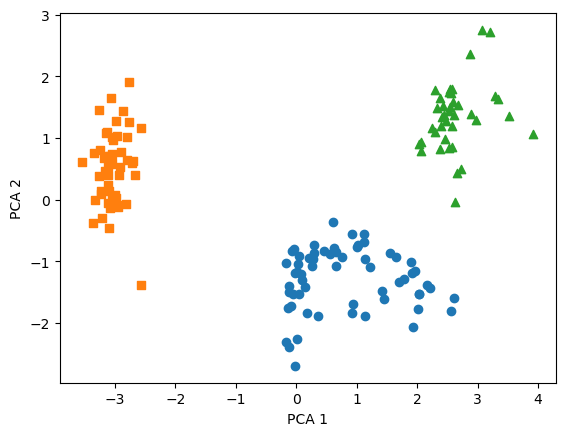

In [18]:
plt.scatter(x=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==0, 'pca_scaled_y'], marker='o')
plt.scatter(x=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==1, 'pca_scaled_y'], marker='s')
plt.scatter(x=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_x'], y=iris_df.loc[iris_df['cluster']==2, 'pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [19]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [20]:
pca_scaled.explained_variance_ratio_

array([0.68099775, 0.19236841])

# 클러스터링 실습

In [21]:
# pca 2개의 주성분

In [22]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [23]:
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
KM = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
KM.fit(cancer_df)

c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [25]:
KM.labels_

array([2, 1, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 1, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [28]:
cancer_df['target'] = cancer.target   # 실제값
cancer_df['cluster'] = KM.labels_
cancer_df.groupby(['target', 'cluster'])['mean radius'].count()

target  cluster
0       0           63
        1           32
        2          117
1       0          354
        2            3
Name: mean radius, dtype: int64

In [29]:
# PCA 2개의 주성분
pca_cancer = PCA(n_components=2)
pca_transformed_cancer = pca_cancer.fit_transform(cancer.data)
pca_transformed_cancer.shape
cancer_df['pca_x'] = pca_transformed_cancer[:, 0]
cancer_df['pca_y'] = pca_transformed_cancer[:, 1]
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,2,1160.142574,-293.917544
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1,1269.122443,15.630182
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,2,995.793889,39.156743
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,0,-407.180803,-67.380320
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,2,930.341180,189.340742


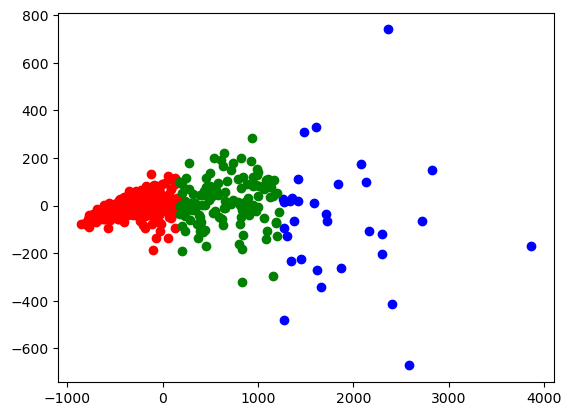

In [30]:
# 시각화
plt.scatter(x=cancer_df.loc[cancer_df['cluster']==0, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster']==0, 'pca_y'], marker='o', color='red')

plt.scatter(x=cancer_df.loc[cancer_df['cluster']==1, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster']==1, 'pca_y'], marker='o', color='blue')

plt.scatter(x=cancer_df.loc[cancer_df['cluster']==2, 'pca_x'],
            y=cancer_df.loc[cancer_df['cluster']==2, 'pca_y'], marker='o', color='green')

plt.show()


## 스케일링

In [31]:
from sklearn.preprocessing import StandardScaler
cancer_scaled = StandardScaler().fit_transform(cancer_df.iloc[:,:-1])
cancer_scaled[:3]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00,
        -1.29767572e+00,  1.85756519e+00,  1.74304337e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-

In [33]:
from sklearn.decomposition import PCA
cancer_pca_scaled = PCA(n_components=2)
cancer_pca_transformed_scaled = cancer_pca_scaled.fit_transform(cancer_scaled)
#주성분1, 주성분2
cancer_df['cancer_pca_scaled_x'] = cancer_pca_transformed_scaled[:, 0]
cancer_df['cancer_pca_scaled_y'] = cancer_pca_transformed_scaled[:, 1]
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst symmetry,worst fractal dimension,target,cluster,pca_x,pca_y,pca_scaled_x,pca_scaled_y,cancer_pca_scaled_x,cancer_pca_scaled_y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,0.4601,0.11890,0,2,1160.142574,-293.917544,9.459459,2.521451,9.459459,2.521451
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,0.2750,0.08902,0,1,1269.122443,15.630182,3.253934,-3.813404,3.253934,-3.813404
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,0.3613,0.08758,0,2,995.793889,39.156743,6.353092,-0.822939,6.353092,-0.822939
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,0.6638,0.17300,0,0,-407.180803,-67.380320,6.131057,10.968206,6.131057,10.968206
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,0.2364,0.07678,0,2,930.341180,189.340742,4.688652,-1.883302,4.688652,-1.883302


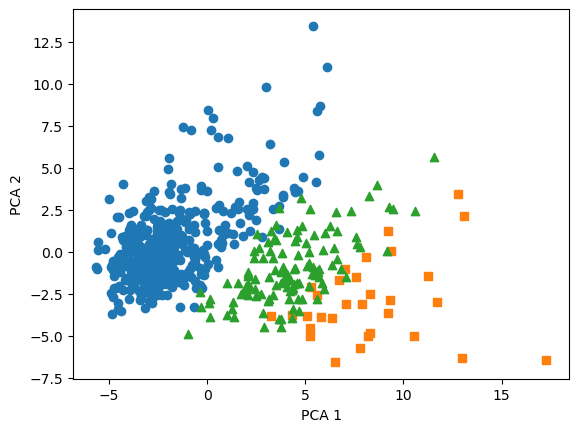

In [34]:
plt.scatter(x=cancer_df.loc[cancer_df['cluster']==0, 'cancer_pca_scaled_x'], y=cancer_df.loc[cancer_df['cluster']==0, 'cancer_pca_scaled_y'], marker='o')
plt.scatter(x=cancer_df.loc[cancer_df['cluster']==1, 'cancer_pca_scaled_x'], y=cancer_df.loc[cancer_df['cluster']==1, 'cancer_pca_scaled_y'], marker='s')
plt.scatter(x=cancer_df.loc[cancer_df['cluster']==2, 'cancer_pca_scaled_x'], y=cancer_df.loc[cancer_df['cluster']==2, 'cancer_pca_scaled_y'], marker='^')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [37]:
pca_cancer.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [36]:
cancer_pca_scaled.explained_variance_ratio_

array([0.45778436, 0.18358256])

# PCA 2개의 주성분, ... 그 이상 주성분 추출

In [ ]:
# pca 2개의 주성분, ... 그이상 주성분 추출
# explained_variance_ratio_ 가 가장 높은 주성분의 갯수
# kmeans data = pca1, pca2, cluster = 2

In [41]:
X = cancer.data

In [45]:
from sklearn.decomposition import PCA

# PCA 모델 a생성 - 주성분 2개
pca_1 = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca_1.fit(X)

# 데이터 변환(PCA 적용)
X_pca = pca_1.transform(X)
X_pca[:2]
df_1 = pd.DataFrame(X_pca, columns=['ftr1', 'ftr2'])

In [46]:
pca_1.components_.shape

(2, 30)

In [47]:
pca_1.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [48]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

df_1['kmeans_label'] = kmeans_labels

print("KMeans Silhouette Score:", silhouette_score(X_pca, kmeans_labels))

KMeans Silhouette Score: 0.6984195775999954


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [49]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [50]:
from sklearn.decomposition import PCA

# PCA 모델 a생성 - 주성분 2개
pca_2 = PCA(n_components=2)

# 모델 학습(규칙 설정)
pca_2.fit(X_scaled)

# 데이터 변환(PCA 적용)
X_pca_2 = pca_2.transform(X_scaled)

In [51]:

pca_2.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [52]:
pca_1.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [55]:
# 주성분 갯수 5

import numpy as np

pca_3 = PCA(n_components=5)
pca_3.fit(X_scaled)
print(np.round(pca_3.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_3.explained_variance_ratio_), 3))

[0.443 0.19  0.094 0.066 0.055]
[0.443 0.632 0.726 0.792 0.847]


In [62]:
pca_7 = PCA(n_components=7)
pca_7.fit(X_scaled)
print(np.round(pca_7.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_7.explained_variance_ratio_), 3))

[0.443 0.19  0.094 0.066 0.055 0.04  0.023]
[0.443 0.632 0.726 0.792 0.847 0.888 0.91 ]


# 7개 주성분으로 kmeans 클러스터링

In [64]:
# 데이터 변환(PCA 적용)
X_pca_7 = pca_7.transform(X_scaled)
X_pca_7.shape

(569, 7)

In [66]:
df_7 = pd.DataFrame(X_pca_7, columns=['ftr1', 'ftr2',
                                      'ftr3', 'ftr4',
                                      'ftr5', 'ftr6',
                                      'ftr7'])
df_7[:3]

,ftr1,ftr2,ftr3,ftr4,ftr5,ftr6,ftr7
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159369
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668167


In [69]:
kmeans_7 = KMeans(n_clusters=2, random_state=42)
kmeans_7_labels = kmeans_7.fit_predict(X_pca_7)

df_7['kmeans_label'] = kmeans_7_labels

print("KMeans Silhouette Score:", silhouette_score(X_pca_7, kmeans_7_labels))

KMeans Silhouette Score: 0.3708218867705669


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [68]:
pca_10 = PCA(n_components=10)
pca_10.fit(X_scaled)
print(np.round(pca_10.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_10.explained_variance_ratio_), 3))

# 데이터 변환(PCA 적용)
X_pca_10 = pca_10.transform(X_scaled)
X_pca_10.shape

df_10 = pd.DataFrame(X_pca_10, columns=['ftr1', 'ftr2',
                                      'ftr3', 'ftr4',
                                      'ftr5', 'ftr6',
                                      'ftr7', 'ftr8', 'ftr9', 'ftr10'])
df_10[:3]

kmeans_10 = KMeans(n_clusters=2, random_state=42)
kmeans_10_labels = kmeans_10.fit_predict(X_pca_10)

df_10['kmeans_label'] = kmeans_10_labels

print("KMeans Silhouette Score:", silhouette_score(X_pca_10, kmeans_10_labels))

[0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012]
[0.443 0.632 0.726 0.792 0.847 0.888 0.91  0.926 0.94  0.952]
KMeans Silhouette Score: 0.3577446779157504


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [70]:
pca_20 = PCA(n_components=20)
pca_20.fit(X_scaled)
print(np.round(pca_20.explained_variance_ratio_, 3))
print(np.round(np.cumsum(pca_20.explained_variance_ratio_), 3))

# 데이터 변환(PCA 적용)
X_pca_20 = pca_20.transform(X_scaled)
X_pca_20.shape

df_20 = pd.DataFrame(X_pca_20, columns=['ftr1', 'ftr2',
                                      'ftr3', 'ftr4',
                                      'ftr5', 'ftr6',
                                      'ftr7', 'ftr8', 'ftr9', 'ftr10',
                                      'ftr11', 'ftr12', 'ftr13',
                                      'ftr14', 'ftr15', 'ftr16',
                                      'ftr17', 'ftr18', 'ftr19',
                                      'ftr20'])
df_20[:3]

kmeans_20 = KMeans(n_clusters=2, random_state=42)
kmeans_20_labels = kmeans_10.fit_predict(X_pca_20)

df_20['kmeans_label'] = kmeans_20_labels

print("KMeans Silhouette Score:", silhouette_score(X_pca_20, kmeans_20_labels))

[0.443 0.19  0.094 0.066 0.055 0.04  0.023 0.016 0.014 0.012 0.01  0.009
 0.008 0.005 0.003 0.003 0.002 0.002 0.002 0.001]
[0.443 0.632 0.726 0.792 0.847 0.888 0.91  0.926 0.94  0.952 0.961 0.97
 0.978 0.983 0.986 0.989 0.991 0.993 0.995 0.996]
KMeans Silhouette Score: 0.3458594667007198


c:\Users\Admin\miniconda3\envs\hi_ml_env\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
